<a href="https://colab.research.google.com/github/LuisAdrRamos/prueba_IA_BIM1/blob/main/%C3%81rbol_de_decision_pruebaIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Cargar los datos desde GitHub

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
X = df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y = df['Survived']

categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=np.number).columns

for col in numerical_cols:
    X[col] = X[col].fillna(X[col].median())

for col in categorical_cols:
    X[col] = X[col].fillna(method='ffill').fillna(method='bfill')

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


<ipython-input-62-3d2b61a43463>:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X[col] = X[col].fillna(method='ffill').fillna(method='bfill')


DecisionTreeClassifier()

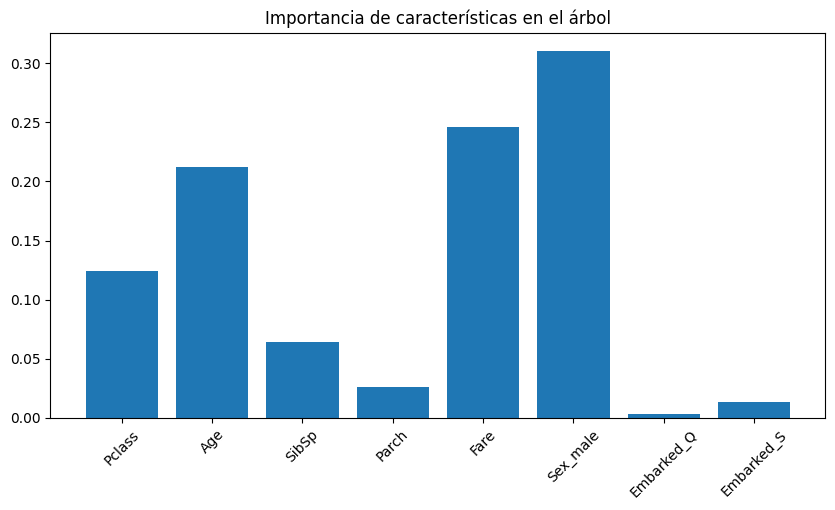

In [ ]:
#Entropia del modelo

import numpy as np
import matplotlib.pyplot as plt

importance = model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10,5))
plt.bar(feature_names, importance)
plt.xticks(rotation=45)
plt.title("Importancia de características en el árbol")
plt.show()

Matriz de confusión:
 [[85 20]
 [19 55]]
Precisión del modelo: 0.7821229050279329


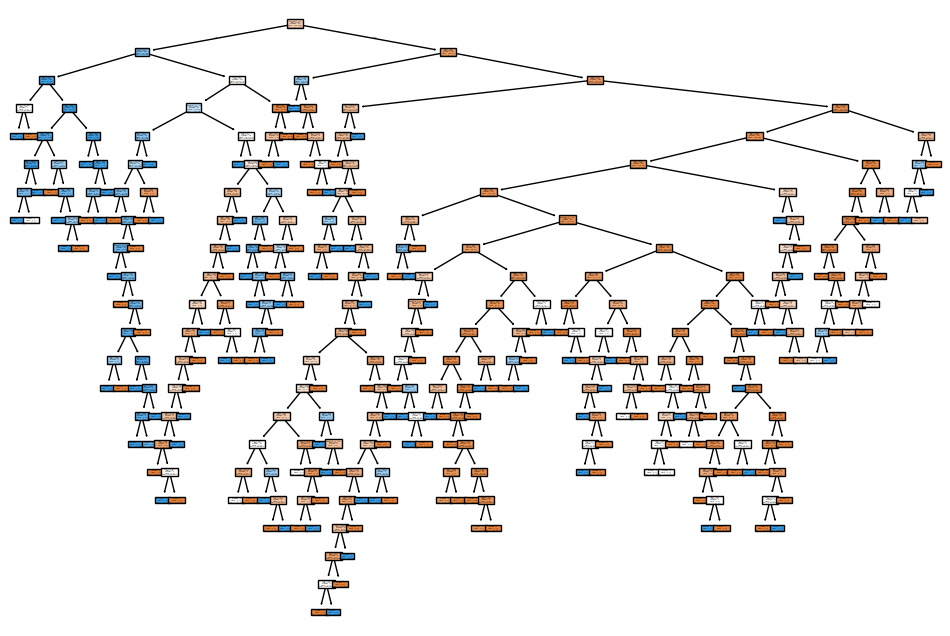

In [ ]:
#Matriz de confusión y árbol de decisión
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(12,8))
plot_tree(model, feature_names=feature_names, class_names=["No sobrevivió", "Sobrevivió"], filled=True)
plt.show()



In [ ]:
# COnclusiones

print("Precisión obtenida: Se puede verificar con la métrica de accuracy_score, que indica qué tan bien el modelo predice la supervivencia.\n"

"Matriz de confusión: Muestra el número de aciertos y errores en la clasificación. Si hay un alto número de falsos positivos o falsos negativos, podemos considerar ajustar el modelo.\n"

" - Incidencia de las Características\n"
"El análisis de entropía indica qué variables fueron más importantes en la toma de decisiones del modelo:\n"

"Pclass (Clase del pasajero) tiene una fuerte influencia, ya que los pasajeros de primera clase tienen mayor probabilidad de sobrevivir.\n"

"Sex_male (si el pasajero es hombre) muestra una gran diferenciación, debido a las prioridades de evacuación (mujeres y niños primero).\n"

"Fare (tarifa pagada) tiene un peso significativo, ya que tarifas más altas suelen estar asociadas con mejores condiciones en el barco.\n"

"- Posibles Mejoras"
"Poda del árbol: Si el modelo se muestra sobreajustado, podríamos limitar la profundidad del árbol para mejorar la generalización.\n")

Precisión obtenida: Se puede verificar con la métrica de accuracy_score, que indica qué tan bien el modelo predice la supervivencia.
Matriz de confusión: Muestra el número de aciertos y errores en la clasificación. Si hay un alto número de falsos positivos o falsos negativos, podemos considerar ajustar el modelo.
 - Incidencia de las Características
El análisis de entropía indica qué variables fueron más importantes en la toma de decisiones del modelo:
Pclass (Clase del pasajero) tiene una fuerte influencia, ya que los pasajeros de primera clase tienen mayor probabilidad de sobrevivir.
Sex_male (si el pasajero es hombre) muestra una gran diferenciación, debido a las prioridades de evacuación (mujeres y niños primero).
Fare (tarifa pagada) tiene un peso significativo, ya que tarifas más altas suelen estar asociadas con mejores condiciones en el barco.
- Posibles MejorasPoda del árbol: Si el modelo se muestra sobreajustado, podríamos limitar la profundidad del árbol para mejorar la gener

In [ ]:

new_passenger = np.array([[3, 22, 1,  7.25, 1, 1]])
print("Sobrevivió" if prediction[0] == 1 else "No sobrevivió")
print("Columnas del modelo:", X_train.columns.tolist())


No sobrevivió
Columnas del modelo: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
